In [322]:
# Importing the packages
import sys
import numpy as np
np.set_printoptions(threshold=sys.maxsize)
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn
import random
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,RocCurveDisplay,ConfusionMatrixDisplay

In [323]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [324]:
# Importing the dataset
df = pd.read_csv('dataset_30.csv')
df.drop(['index'], axis=1, inplace=True)
#df.head()

In [325]:
# if your dataset contains missing value, check which column has missing values
#df.isnull().sum()

In [326]:
#df.dropna(inplace=True)

In [327]:
from sklearn import preprocessing


col = df.columns[:]

lab_en= preprocessing.LabelEncoder()

for c in col:
    df[c]= lab_en.fit_transform(df[c])

#df.head(50)

In [328]:
a=len(df[df.Result==0])
b=len(df[df.Result==1])


In [329]:
print("Count of Legitimate Websites = ", a)
print("Count of Phishy Websites = ", b)

Count of Legitimate Websites =  4898
Count of Phishy Websites =  6157


In [330]:
X = df.drop(['Result'], axis=1, inplace=False)
#X.head()
#same work
##inplace true modifies the og data & does not return anything
##inplace false does not modify og data but returns something whoch we store in a var
# X= df.drop(columns='Result')
# X.head()

In [331]:
#df.head()

In [332]:
y = df['Result']
y = pd.DataFrame(y)
y.head()

,Result
0,0
1,0
2,0
3,0
4,1


In [333]:
# separate dataset into train and test
from cProfile import label
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=10)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7738, 30), (3317, 30), (7738, 1), (3317, 1))

In [334]:
#perform chi square test
from sklearn.feature_selection import chi2
f_p_values = chi2(X_train,y_train)

In [335]:
f_p_values

(array([2.24728145e+01, 5.38784812e+01, 5.03249360e+00, 3.83671222e+00,
        1.68176772e+00, 8.20768441e+02, 4.52503451e+02, 2.66189096e+03,
        2.70267968e+02, 7.35475144e-03, 1.55472779e+00, 2.46950144e+00,
        2.10635122e+02, 2.09920590e+03, 3.13269211e+02, 5.21473196e+02,
        5.20045979e-01, 4.51736930e+00, 3.28650457e+00, 1.70791844e+00,
        9.24087420e-02, 8.74179169e-04, 3.80728975e-04, 5.46224163e+01,
        1.36738388e+01, 4.87492812e+02, 6.43890373e+01, 1.65423051e+01,
        1.36921170e+00, 6.09019636e+00]),
 array([2.13138824e-006, 2.13280861e-013, 2.48760576e-002, 5.01417529e-002,
        1.94689729e-001, 1.64702370e-180, 2.05730537e-100, 0.00000000e+000,
        9.91989265e-061, 9.31657326e-001, 2.12438845e-001, 1.16074737e-001,
        9.98392056e-048, 0.00000000e+000, 4.23702310e-070, 2.02315605e-115,
        4.70822069e-001, 3.35523845e-002, 6.98515795e-002, 1.91255666e-001,
        7.61136986e-001, 9.76412766e-001, 9.84432443e-001, 1.46060070e-013

In [336]:
#The less the p_values the more important that feature is
p_values = pd.Series(f_p_values[1])
p_values.index = X_train.columns
p_values

having_IPhaving_IP_Address      2.131388e-06
URLURL_Length                   2.132809e-13
Shortining_Service              2.487606e-02
having_At_Symbol                5.014175e-02
double_slash_redirecting        1.946897e-01
Prefix_Suffix                  1.647024e-180
having_Sub_Domain              2.057305e-100
SSLfinal_State                  0.000000e+00
Domain_registeration_length     9.919893e-61
Favicon                         9.316573e-01
port                            2.124388e-01
HTTPS_token                     1.160747e-01
Request_URL                     9.983921e-48
URL_of_Anchor                   0.000000e+00
Links_in_tags                   4.237023e-70
SFH                            2.023156e-115
Submitting_to_email             4.708221e-01
Abnormal_URL                    3.355238e-02
Redirect                        6.985158e-02
on_mouseover                    1.912557e-01
RightClick                      7.611370e-01
popUpWidnow                     9.764128e-01
Iframe    

In [337]:
#sort p_values to check which feature has the lowest values
p_values = p_values.sort_values(ascending = False)
p_values

Iframe                          9.844324e-01
popUpWidnow                     9.764128e-01
Favicon                         9.316573e-01
RightClick                      7.611370e-01
Submitting_to_email             4.708221e-01
Links_pointing_to_page          2.419474e-01
port                            2.124388e-01
double_slash_redirecting        1.946897e-01
on_mouseover                    1.912557e-01
HTTPS_token                     1.160747e-01
Redirect                        6.985158e-02
having_At_Symbol                5.014175e-02
Abnormal_URL                    3.355238e-02
Shortining_Service              2.487606e-02
Statistical_report              1.359340e-02
DNSRecord                       2.174629e-04
Google_Index                    4.757666e-05
having_IPhaving_IP_Address      2.131388e-06
URLURL_Length                   2.132809e-13
age_of_domain                   1.460601e-13
Page_Rank                       1.021248e-15
Request_URL                     9.983921e-48
Domain_reg

In [338]:
def DropFeature (p_values, threshold):
	drop_feature = set()
	for index, values in p_values.items():
		if values > threshold or np.isnan(values):
			drop_feature.add(index)
	return drop_feature

In [339]:
drop_feature = DropFeature(p_values,.05)
len(set(drop_feature))


12

In [340]:
drop_feature

{'Favicon',
 'HTTPS_token',
 'Iframe',
 'Links_pointing_to_page',
 'Redirect',
 'RightClick',
 'Submitting_to_email',
 'double_slash_redirecting',
 'having_At_Symbol',
 'on_mouseover',
 'popUpWidnow',
 'port'}

In [341]:
X_train.drop(drop_feature, axis=1, inplace=True)
X_test.drop(drop_feature, axis=1, inplace=True)

In [342]:
len(df.columns)

31

In [343]:
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 7738 samples.
Testing set has 3317 samples.


In [344]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# defining parameter range
param_grid = {'penalty' : ['l2'],
            'C' : [0.1, 1, 10, 20, 30],
            'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
            'max_iter' : [2500, 5000]}

grid_logr = GridSearchCV(LogisticRegression(), param_grid, refit = True, cv = 10, verbose = 3, n_jobs = -1)

# fitting the model for grid search
grid_logr.fit(X_train, y_train.values.ravel())

# print best parameter after tuning
print(grid_logr.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid_logr.best_estimator_)
print(grid_logr.best_score_)

Fitting 10 folds for each of 50 candidates, totalling 500 fits
{'C': 1, 'max_iter': 2500, 'penalty': 'l2', 'solver': 'sag'}
LogisticRegression(C=1, max_iter=2500, solver='sag')
0.9246594529184259


In [345]:
logr_model = grid_logr.best_estimator_

# Performing training
#logr_model = logr.fit(X_train, y_train.values.ravel())

In [346]:
logr_predict  =  logr_model.predict(X_test)

In [347]:
# from sklearn.metrics import confusion_matrix,accuracy_score
# cm = confusion_matrix(y_test, dct_pred)
# ac = accuracy_score(y_test, dct_pred)

In [348]:
print ("Accuracy of logr classifier : ", accuracy_score(y_test, logr_predict)*100)

Accuracy of logr classifier :  91.98070545673802


In [349]:
print(classification_report(y_test, logr_predict))

              precision    recall  f1-score   support

           0       0.92      0.89      0.91      1444
           1       0.92      0.94      0.93      1873

    accuracy                           0.92      3317
   macro avg       0.92      0.92      0.92      3317
weighted avg       0.92      0.92      0.92      3317



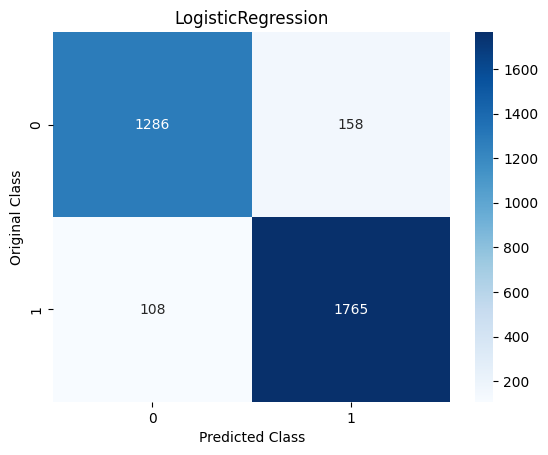

In [350]:
sns.heatmap(confusion_matrix(y_test, logr_predict), annot=True, fmt='g', cmap='Blues')
plt.title("LogisticRegression")
plt.xlabel('Predicted Class')
plt.ylabel('Original Class')
plt.show()

In [351]:
# from sklearn.neighbors import KNeighborsClassifier

# #training_accuracy=[]
# test_accuracy=[]

# neighbors=range(1,10)
# ##values.ravel() converts vector y to flattened array
# for i in neighbors:
#     knn=KNeighborsClassifier(n_neighbors=i)
#     knn_model = knn.fit(X_train,y_train.values.ravel())
#     #training_accuracy.append(knn.score(X_train,y_train.values.ravel()))
#     test_accuracy.append(knn_model.score(X_test,y_test.values.ravel()))

In [352]:
# plt.plot(neighbors,test_accuracy,label="test accuracy")
# plt.ylabel("Accuracy")
# plt.xlabel("number of neighbors")
# plt.legend()
# plt.show()

In [353]:
from sklearn.neighbors import KNeighborsClassifier

# defining parameter range
param_grid = {'n_neighbors': [1,2,3,4,5,6,7,8,9,10]}

grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid, refit = True, cv = 10, verbose = 3, n_jobs = -1)

# fitting the model for grid search
grid_knn.fit(X_train, y_train.values.ravel())

# print best parameter after tuning
print(grid_knn.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid_knn.best_estimator_)
print(grid_knn.best_score_)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
{'n_neighbors': 1}
KNeighborsClassifier(n_neighbors=1)
0.9519234433446654


In [354]:
knn_model = grid_knn.best_estimator_
#knn_model = knn.fit(X_train,y_train.values.ravel())

In [355]:
#print ("Accuracy of knn classifier: ", max(test_accuracy)*100)
knn_predict = knn_model.predict(X_test)

In [356]:
print('The accuracy of knn Classifier is: ', 100.0 * accuracy_score(y_test, knn_predict))

The accuracy of knn Classifier is:  95.29695507989146


In [357]:
print(classification_report(y_test, knn_predict))

              precision    recall  f1-score   support

           0       0.95      0.94      0.95      1444
           1       0.95      0.96      0.96      1873

    accuracy                           0.95      3317
   macro avg       0.95      0.95      0.95      3317
weighted avg       0.95      0.95      0.95      3317



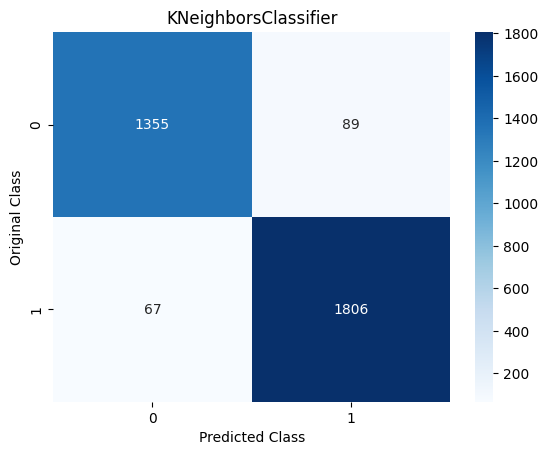

In [358]:
sns.heatmap(confusion_matrix(y_test, knn_predict), annot=True, fmt='g', cmap='Blues')
plt.title("KNeighborsClassifier")
plt.xlabel('Predicted Class')
plt.ylabel('Original Class')
plt.show()

In [359]:
# # here is the change
# knn_y_pred_proba = knn.predict_proba(X_test)
# knn_y_pred_proba_positive = knn_y_pred_proba[:, 1] 

# RocCurveDisplay.from_predictions(y_test,knn_y_pred_proba_positive)

# fig, ax = plt.subplots()
# RocCurveDisplay.from_estimator(
#    logreg, X_test, y_test, ax = ax)

# logreg_y_decision = logreg.decision_function(X_test)
# metrics.RocCurveDisplay.from_predictions(y_test,logreg_y_decision,ax=ax,name="logreg predictions")

In [360]:
from sklearn.svm import SVC

# defining parameter range
param_grid = {'C': [0.1, 1, 10],
			'gamma': [1, 0.1, 0.01],
			'kernel': ['linear','poly', 'rbf', 'sigmoid']}

grid_svc = GridSearchCV(SVC(), param_grid, refit = True, cv = 10, verbose = 3, n_jobs = -1)

# fitting the model for grid search
grid_svc.fit(X_train, y_train.values.ravel())

# print best parameter after tuning
print(grid_svc.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid_svc.best_estimator_)
print(grid_svc.best_score_)

Fitting 10 folds for each of 36 candidates, totalling 360 fits
{'C': 1, 'gamma': 1, 'kernel': 'rbf'}
SVC(C=1, gamma=1)
0.9564464100069865


In [361]:
svc_model = grid_svc.best_estimator_
#svc_model = svc.fit(X_train,y_train.values.ravel())

In [362]:
svc_predict = svc_model.predict(X_test)

In [363]:
print('The accuracy of svc Classifier is: ', 100.0 * accuracy_score(y_test, svc_predict))

The accuracy of svc Classifier is:  96.11094362375641


In [364]:
print(classification_report(y_test, svc_predict))

              precision    recall  f1-score   support

           0       0.96      0.95      0.95      1444
           1       0.96      0.97      0.97      1873

    accuracy                           0.96      3317
   macro avg       0.96      0.96      0.96      3317
weighted avg       0.96      0.96      0.96      3317



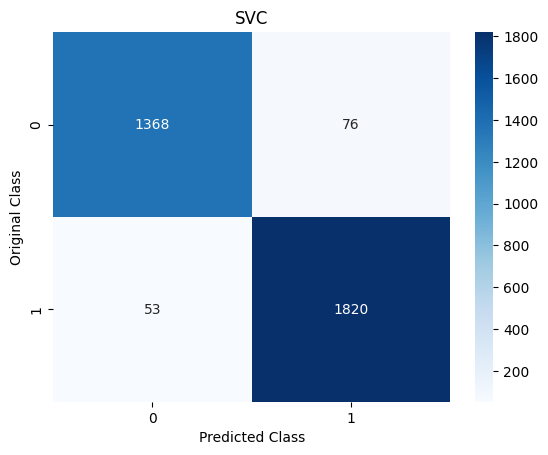

In [365]:
sns.heatmap(confusion_matrix(y_test, svc_predict), annot=True, fmt='g', cmap='Blues')
plt.title("SVC")
plt.xlabel('Predicted Class')
plt.ylabel('Original Class')
plt.show()

In [366]:
from sklearn.svm import NuSVC

# defining parameter range
param_grid = {'nu': [0.1, 0.5],
			'gamma': [1, 0.1, 0.01],
			'kernel': ['linear','poly', 'rbf', 'sigmoid']}

grid_nusvc = GridSearchCV(NuSVC(), param_grid, refit = True, verbose = 3, cv = 10, n_jobs = -1)

# fitting the model for grid search
grid_nusvc.fit(X_train, y_train.values.ravel())

# print best parameter after tuning
print(grid_nusvc.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid_nusvc.best_estimator_)
print(grid_nusvc.best_score_)

Fitting 10 folds for each of 24 candidates, totalling 240 fits
{'gamma': 1, 'kernel': 'rbf', 'nu': 0.1}
NuSVC(gamma=1, nu=0.1)
0.9547658206056472


In [367]:
nusvc_model = grid_nusvc.best_estimator_
#nusvc_model = nusvc.fit(X_train, y_train.values.ravel())


In [368]:
nusvc_predict = nusvc_model.predict(X_test)

In [369]:
print('The accuracy of nusvc Classifier is: ', 100.0 * accuracy_score(y_test, nusvc_predict))

The accuracy of nusvc Classifier is:  96.68375037684655


In [370]:
print(classification_report(y_test, nusvc_predict))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96      1444
           1       0.96      0.98      0.97      1873

    accuracy                           0.97      3317
   macro avg       0.97      0.97      0.97      3317
weighted avg       0.97      0.97      0.97      3317



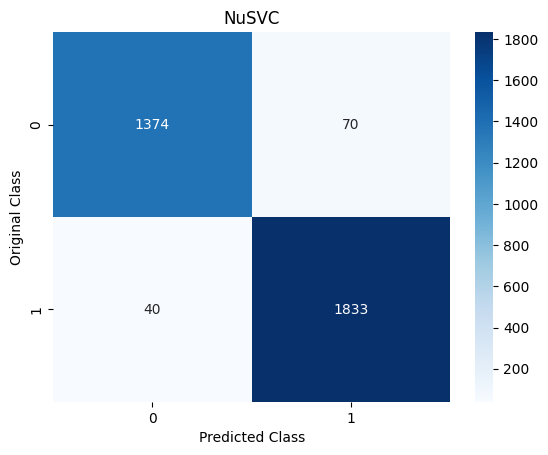

In [371]:
sns.heatmap(confusion_matrix(y_test, nusvc_predict), annot=True, fmt='g', cmap='Blues')
plt.title("NuSVC")
plt.xlabel('Predicted Class')
plt.ylabel('Original Class')
plt.show()

In [372]:
from sklearn.svm import LinearSVC

# defining parameter range
param_grid = {'C': [0.1, 1, 10, 20, 30],
			'penalty': ['l1','l2'],
			'loss': ['squared_hinge'],
			'dual': [False],
			'tol': [.1,.01,.001]}

grid_lsvc = GridSearchCV(LinearSVC(), param_grid, refit = True, verbose = 3, cv = 10, n_jobs = -1)

# fitting the model for grid search
grid_lsvc.fit(X_train, y_train.values.ravel())

# print best parameter after tuning
print(grid_lsvc.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid_lsvc.best_estimator_)
print(grid_lsvc.best_score_)


Fitting 10 folds for each of 30 candidates, totalling 300 fits
{'C': 1, 'dual': False, 'loss': 'squared_hinge', 'penalty': 'l2', 'tol': 0.001}
LinearSVC(C=1, dual=False, tol=0.001)
0.9240139595054002


In [373]:
lsvc_model = grid_lsvc.best_estimator_
#lsvc_model = lsvc.fit(X_train, y_train.values.ravel())

In [374]:
lsvc_predict = lsvc_model.predict(X_test)

In [375]:
print('The accuracy of lsvc Classifier is: ', 100.0 * accuracy_score(y_test, lsvc_predict))

The accuracy of lsvc Classifier is:  92.1615917998191


In [376]:
print(classification_report(y_test, lsvc_predict))

              precision    recall  f1-score   support

           0       0.93      0.89      0.91      1444
           1       0.92      0.95      0.93      1873

    accuracy                           0.92      3317
   macro avg       0.92      0.92      0.92      3317
weighted avg       0.92      0.92      0.92      3317



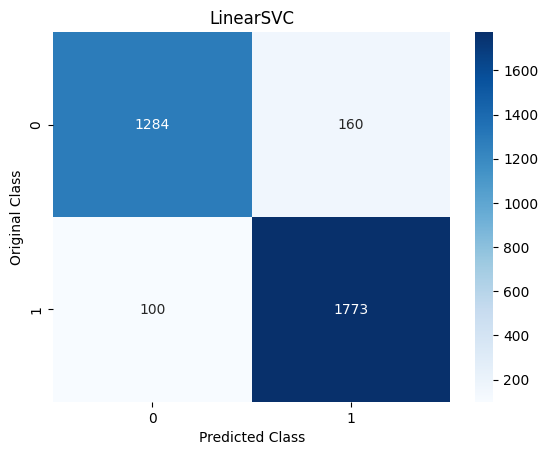

In [377]:
sns.heatmap(confusion_matrix(y_test, lsvc_predict), annot=True, fmt='g', cmap='Blues')
plt.title("LinearSVC")
plt.xlabel('Predicted Class')
plt.ylabel('Original Class')
plt.show()

In [378]:
from sklearn.ensemble import AdaBoostClassifier

# defining parameter range
param_grid = {'n_estimators': [40,50,100,200,300]}

grid_ada = GridSearchCV(AdaBoostClassifier(), param_grid, refit = True, verbose = 3, cv = 10, n_jobs = -1)

# fitting the model for grid search
grid_ada.fit(X_train, y_train.values.ravel())

# print best parameter after tuning
print(grid_ada.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid_ada.best_estimator_)
print(grid_ada.best_score_)

Fitting 10 folds for each of 5 candidates, totalling 50 fits
{'n_estimators': 200}
AdaBoostClassifier(n_estimators=200)
0.9328011606178818


In [379]:
ada_model = grid_ada.best_estimator_
#ada_model = ada.fit(X_train,y_train.values.ravel())

In [380]:
ada_predict = ada_model.predict(X_test)

In [381]:
print('The accuracy of Ada Boost Classifier is: ', 100.0 * accuracy_score(ada_predict,y_test))

The accuracy of Ada Boost Classifier is:  93.21676213445885


In [382]:
print(classification_report(y_test, ada_predict))

              precision    recall  f1-score   support

           0       0.94      0.90      0.92      1444
           1       0.93      0.96      0.94      1873

    accuracy                           0.93      3317
   macro avg       0.93      0.93      0.93      3317
weighted avg       0.93      0.93      0.93      3317



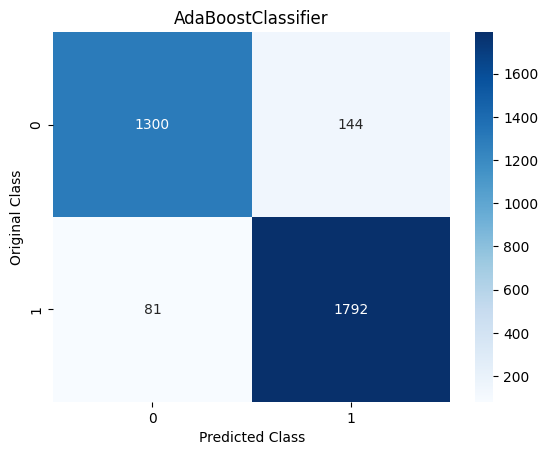

In [383]:
sns.heatmap(confusion_matrix(y_test, ada_predict), annot=True, fmt='g', cmap='Blues')
plt.title("AdaBoostClassifier")
plt.xlabel('Predicted Class')
plt.ylabel('Original Class')
plt.show()

In [384]:
from xgboost import XGBClassifier


# defining parameter range
param_grid = {
    "gamma": [.01, .1, .5],
    "n_estimators": [50,100,150,200,250]
}

grid_xgb = GridSearchCV(XGBClassifier(), param_grid, refit = True, verbose = 3, cv = 10, n_jobs = -1)

# fitting the model for grid search
grid_xgb.fit(X_train, y_train.values.ravel())

# print best parameter after tuning
print(grid_xgb.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid_xgb.best_estimator_)
print(grid_xgb.best_score_)


Fitting 10 folds for each of 15 candidates, totalling 150 fits
{'gamma': 0.01, 'n_estimators': 200}
XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0.01, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=200,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
0.9609702123676671


In [385]:
xgb_model = grid_xgb.best_estimator_
#xgb_model = xgb.fit(X_train,y_train)

In [386]:
xgb_predict=xgb_model.predict(X_test)

In [387]:
print('The accuracy of XGBoost Classifier is: ' , 100.0 * accuracy_score(xgb_predict,y_test))

The accuracy of XGBoost Classifier is:  96.11094362375641


In [388]:
print(classification_report(y_test, xgb_predict))

              precision    recall  f1-score   support

           0       0.96      0.95      0.96      1444
           1       0.96      0.97      0.97      1873

    accuracy                           0.96      3317
   macro avg       0.96      0.96      0.96      3317
weighted avg       0.96      0.96      0.96      3317



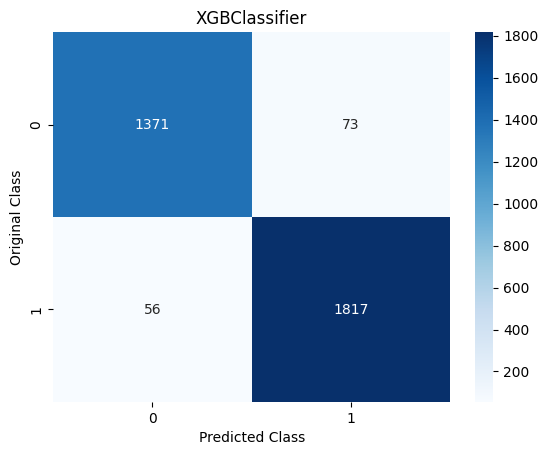

In [389]:
sns.heatmap(confusion_matrix(y_test, xgb_predict), annot=True, fmt='g', cmap='Blues')
plt.title("XGBClassifier")
plt.xlabel('Predicted Class')
plt.ylabel('Original Class')
plt.show()

In [390]:
from sklearn.ensemble import GradientBoostingClassifier

# defining parameter range
param_grid = {
    "learning_rate": [.1,.5,1],
    "n_estimators": [50,100,150,200,250]
}

grid_gbc = GridSearchCV(GradientBoostingClassifier(), param_grid, refit = True, verbose = 3, cv = 10, n_jobs = -1)

# fitting the model for grid search
grid_gbc.fit(X_train, y_train.values.ravel())

# print best parameter after tuning
print(grid_gbc.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid_gbc.best_estimator_)
print(grid_gbc.best_score_)

Fitting 10 folds for each of 15 candidates, totalling 150 fits
{'learning_rate': 0.5, 'n_estimators': 250}
GradientBoostingClassifier(learning_rate=0.5, n_estimators=250)
0.9578681000564933


In [391]:
gbc_model = grid_gbc.best_estimator_
#gbc_model = gbc.fit(X_train,y_train.values.ravel())

#clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
#    max_depth=1, random_state=0).fit(X_train, y_train)
#clf.score(X_test, y_test)

In [392]:
gbc_predict = gbc_model.predict(X_test)

In [393]:
print('The accuracy of GradientBoost Classifier is: ' , 100.0 * accuracy_score(gbc_predict,y_test))

The accuracy of GradientBoost Classifier is:  96.05064817606271


In [394]:
print(classification_report(y_test, gbc_predict))

              precision    recall  f1-score   support

           0       0.96      0.95      0.95      1444
           1       0.96      0.97      0.97      1873

    accuracy                           0.96      3317
   macro avg       0.96      0.96      0.96      3317
weighted avg       0.96      0.96      0.96      3317



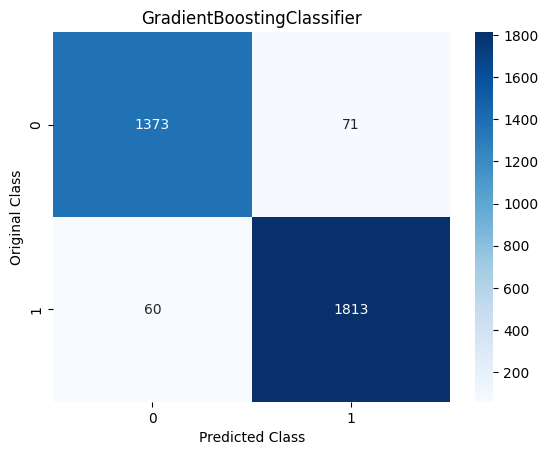

In [395]:
sns.heatmap(confusion_matrix(y_test, gbc_predict), annot=True, fmt='g', cmap='Blues')
plt.title("GradientBoostingClassifier")
plt.xlabel('Predicted Class')
plt.ylabel('Original Class')
plt.show()

In [396]:
# gbc_model.get_params().keys()

In [397]:
# import inspect
# import sklearn
# import xgboost

# models = [xgboost.XGBClassifier]
# for m in models:
#     hyperparams = inspect.signature(m.__init__)
#     print(hyperparams)
# #or
# xgb_model.get_params().keys()


In [398]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

# defining parameter range
param_grid = {
    "base_estimator": [DecisionTreeClassifier()],
    "n_estimators": [50,100,150,200,250]
}

grid_bag = GridSearchCV(BaggingClassifier(), param_grid, refit = True, verbose = 3, cv = 10, n_jobs = -1)

# fitting the model for grid search
grid_bag.fit(X_train, y_train.values.ravel())

# print best parameter after tuning
print(grid_bag.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid_bag.best_estimator_)
print(grid_bag.best_score_)

Fitting 10 folds for each of 5 candidates, totalling 50 fits
{'base_estimator': DecisionTreeClassifier(), 'n_estimators': 50}
BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=50)
0.9581269994083256


In [399]:
bag_model = grid_bag.best_estimator_
#bag_model = bag.fit(X_train, y_train.values.ravel())


In [400]:
bag_predict = bag_model.predict(X_test)

In [401]:
print('The accuracy of Bagging Classifier is: ' , 100.0 * accuracy_score(y_test, bag_predict))

The accuracy of Bagging Classifier is:  96.2315345191438


In [402]:
print(classification_report(y_test, bag_predict))

              precision    recall  f1-score   support

           0       0.96      0.95      0.96      1444
           1       0.96      0.97      0.97      1873

    accuracy                           0.96      3317
   macro avg       0.96      0.96      0.96      3317
weighted avg       0.96      0.96      0.96      3317



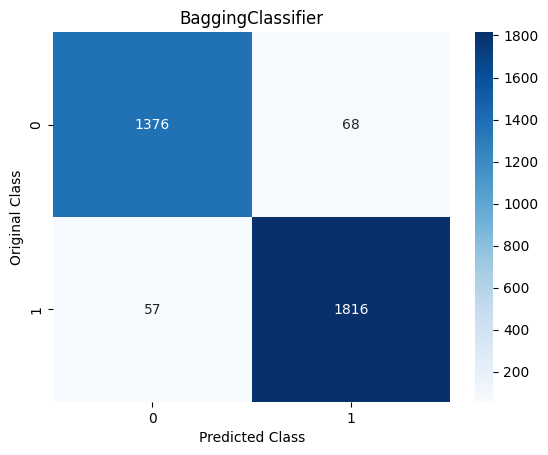

In [403]:
sns.heatmap(confusion_matrix(y_test, bag_predict), annot=True, fmt='g', cmap='Blues')
plt.title("BaggingClassifier")
plt.xlabel('Predicted Class')
plt.ylabel('Original Class')
plt.show()

In [404]:
from sklearn.ensemble import RandomForestClassifier

# defining parameter range
param_grid = {
    "n_estimators": [50,100,150,200,250]
}

grid_rfc = GridSearchCV(RandomForestClassifier(), param_grid, refit = True, verbose = 3, cv = 10, n_jobs = -1)

# fitting the model for grid search
grid_rfc.fit(X_train, y_train.values.ravel())

# print best parameter after tuning
print(grid_rfc.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid_rfc.best_estimator_)
print(grid_rfc.best_score_)

Fitting 10 folds for each of 5 candidates, totalling 50 fits
{'n_estimators': 150}
RandomForestClassifier(n_estimators=150)
0.9609705466470111


In [405]:
rfc_model = grid_rfc.best_estimator_
#rfc_model = rfc.fit(X_train,y_train.values.ravel())

In [406]:
rfc_predict = rfc_model.predict(X_test)

In [407]:
print('The accuracy of RandomForest Classifier is: ' , 100.0 * accuracy_score(rfc_predict,y_test))

The accuracy of RandomForest Classifier is:  96.8344889960808


In [408]:
print(classification_report(y_test, rfc_predict))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96      1444
           1       0.97      0.98      0.97      1873

    accuracy                           0.97      3317
   macro avg       0.97      0.97      0.97      3317
weighted avg       0.97      0.97      0.97      3317



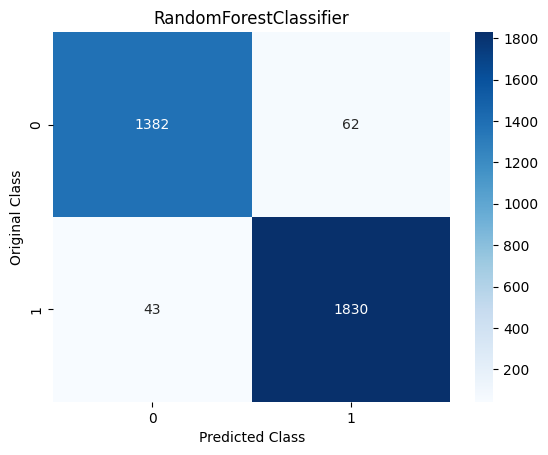

In [409]:
sns.heatmap(confusion_matrix(y_test, rfc_predict), annot=True, fmt='g', cmap='Blues')
plt.title("RandomForestClassifier")
plt.xlabel('Predicted Class')
plt.ylabel('Original Class')
plt.show()

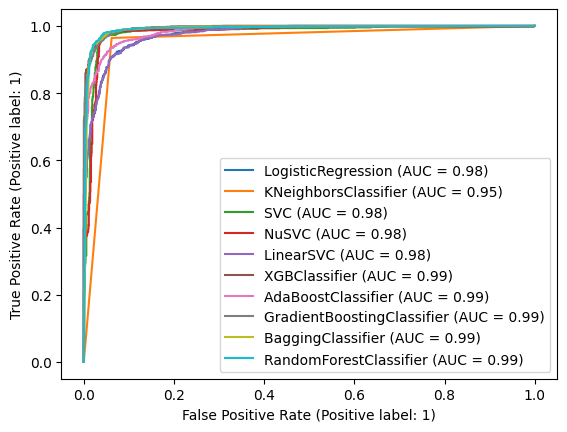

In [410]:
estimators = [logr_model,knn_model,svc_model,nusvc_model,lsvc_model,xgb_model,ada_model,gbc_model,bag_model,rfc_model]

for estimator in estimators:
    RocCurveDisplay.from_estimator(estimator,X_test,y_test,ax=plt.gca())


In [411]:
import tensorflow as tf
#from tensorflow.keras.datasets import imdb
from keras.layers import Embedding, Dense, LSTM, BatchNormalization
from keras.losses import BinaryCrossentropy
from keras.models import Sequential
from keras.optimizers import Adam
#from tensorflow.keras.preprocessing.sequence import pad_sequences

# Model configuration
additional_metrics = ['accuracy']
batch_size = 32
#embedding_output_dims = (X_train.shape[1])
loss_function = BinaryCrossentropy()
#max_sequence_length = (X_train.shape[1])
#num_distinct_words = (X_train.shape[1])
number_of_epochs = 100
optimizer = Adam()
validation_split = 0.20
verbosity_mode = 1

# reshape from [samples, features] into [samples, timesteps, features]
timesteps = 1
X_train_reshape = X_train.values.ravel().reshape(X_train.shape[0],timesteps, X_train.shape[1])
X_test_reshape = X_test.values.ravel().reshape(X_test.shape[0],timesteps, X_test.shape[1])

# Disable eager execution
#tf.compat.v1.disable_eager_execution()

# Load dataset
# (x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=num_distinct_words)
# print(x_train.shape)
# print(x_test.shape)

# Pad all sequences
# padded_inputs = pad_sequences(X_train, maxlen=max_sequence_length, value = 0.0) # 0.0 because it corresponds with <PAD>
# padded_inputs_test = pad_sequences(X_test, maxlen=max_sequence_length, value = 0.0) # 0.0 because it corresponds with <PAD>

# Define the Keras model
def build_model_lstm():
    model = Sequential()
    #model.add(Embedding(num_distinct_words, embedding_output_dims, input_length=max_sequence_length))
    model.add(LSTM(100, input_shape = (timesteps,X_train_reshape.shape[2])))
    model.add(BatchNormalization())
    model.add(Dense(50, activation='relu'))
    model.add(Dense(25, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    # Compile the model
    model.compile(optimizer=optimizer, loss=loss_function, metrics=additional_metrics)
    return model

#from keras.wrappers.scikit_learn import KerasClassifier
lstm_model = build_model_lstm()
# Give a summary
lstm_model.summary()

# Train the model
history = lstm_model.fit(X_train_reshape, y_train.values.ravel(), batch_size=batch_size, epochs=number_of_epochs, verbose=verbosity_mode, validation_split=validation_split)

# Test the model after training
#lstm_predict = lstm_model.predict(X_test_reshape)
test_results = lstm_model.evaluate(X_test_reshape, y_test.values.ravel(), verbose=False)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {100*test_results[1]}%')

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 100)               47600     
                                                                 
 batch_normalization_3 (Batc  (None, 100)              400       
 hNormalization)                                                 
                                                                 
 dense_12 (Dense)            (None, 50)                5050      
                                                                 
 dense_13 (Dense)            (None, 25)                1275      
                                                                 
 dense_14 (Dense)            (None, 10)                260       
                                                                 
 dense_15 (Dense)            (None, 1)                 11        
                                                      

In [412]:
lstm_predict_proba = lstm_model.predict(X_test_reshape, batch_size=32)
lstm_predict_class = (lstm_predict_proba > 0.5).astype("int32")
print(classification_report(y_test, lstm_predict_class))

104/104 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.95      0.94      0.95      1444
           1       0.96      0.96      0.96      1873

    accuracy                           0.95      3317
   macro avg       0.95      0.95      0.95      3317
weighted avg       0.95      0.95      0.95      3317



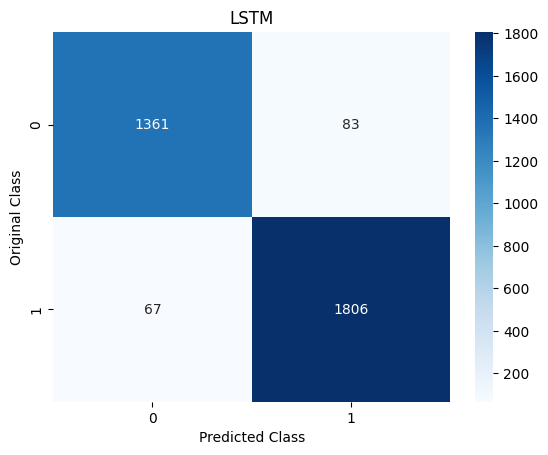

In [413]:
sns.heatmap(confusion_matrix(y_test, lstm_predict_class), annot=True, fmt='g', cmap='Blues')
plt.title("LSTM")
plt.xlabel('Predicted Class')
plt.ylabel('Original Class')
plt.show()


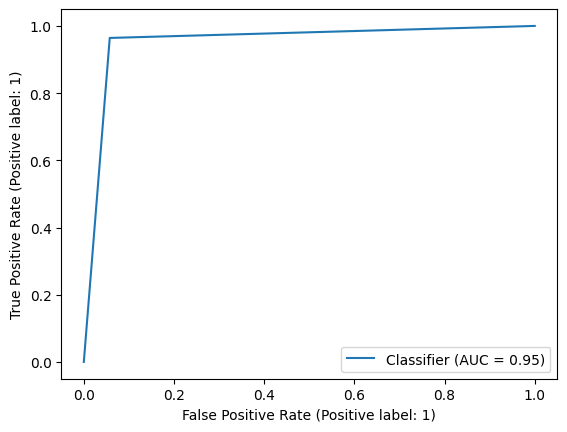

In [414]:
RocCurveDisplay.from_predictions(y_test,lstm_predict_class)
plt.show()